In [5]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [6]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [7]:
features[0], labels[0]

(
 [1.1630785 0.4838046]
 <NDArray 2 @cpu(0)>, 
 [4.879625]
 <NDArray 1 @cpu(0)>)

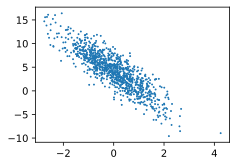

In [8]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [10]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.13657182 -0.7509184 ]
 [ 0.9232334  -0.17322695]
 [-1.3588097   1.1656759 ]
 [-0.22538121 -0.15575494]
 [ 1.3267368  -0.8406525 ]
 [-0.37107468 -1.4219483 ]
 [-0.63217986  1.2446454 ]
 [-1.1967287  -0.05582698]
 [ 0.3776586   0.5235395 ]
 [-1.4682876   0.5651783 ]]
<NDArray 10x2 @cpu(0)> 
[ 7.0273776  6.6437273 -2.4718847  4.2736063  9.71534    8.29892
 -1.2965587  1.9914036  3.1612701 -0.6382029]
<NDArray 10 @cpu(0)>


In [11]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [12]:
w.attach_grad()
b.attach_grad()

In [13]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [14]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [15]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [16]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_1 = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_1.mean().asnumpy()))

epoch 1, loss 0.035053
epoch 2, loss 0.000126
epoch 3, loss 0.000049


In [17]:
true_w, w

([2, -3.4], 
 [[ 1.9995347]
  [-3.3999112]]
 <NDArray 2x1 @cpu(0)>)

In [18]:
true_b, b

(4.2, 
 [4.1995473]
 <NDArray 1 @cpu(0)>)